In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

csv_path = "wandb_data/1 broad sweep/"

In [194]:
df1 = pd.read_csv(csv_path + "1 conbandit noisynet-dqn.csv")
df2 = pd.read_csv(csv_path + "2 conbandit regular dqn.csv")
df3 = pd.read_csv(csv_path + "3 nnbandit noisynet-dqn.csv")
df4 = pd.read_csv(csv_path + "4 nnbandit regular dqn.csv")
df1['env'] = 'ContextualBandit-v2 NoisyNet-DQN'
df2['env'] = 'ContextualBandit-v2 regular DQN'
df3['env'] = 'NNBandit-v0 NoisyNet-DQN'
df4['env'] = 'NNBandit-v0 regular DQN'

In [195]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    100 non-null    object 
 1   noisy_layer_init_std    100 non-null    float64
 2   regret                  100 non-null    float64
 3   noisy_reward            100 non-null    bool   
 4   hidden_layer_size       100 non-null    int64  
 5   noisy_layer_distr_type  100 non-null    object 
 6   seed                    100 non-null    int64  
 7   noisy_output_layer      100 non-null    bool   
 8   _wandb                  0 non-null      float64
 9   env                     100 non-null    object 
dtypes: bool(2), float64(3), int64(2), object(3)
memory usage: 6.6+ KB


In [272]:
def plot_noisynet_metric(x_n, y_n, log_x):
    _df1 = df1.groupby(x_n)[y_n].mean().reset_index()
    _df3 = df3.groupby(x_n)[y_n].mean().reset_index()
    
    plt.figure(figsize=(10, 2.5))
    if log_x: plt.xscale('log')
    
    sns.lineplot(data=_df1, x=x_n, y=y_n, marker='o', label='ContextualBandit-v2 NoisyNet-DQN')
    sns.lineplot(data=_df3, x=x_n, y=y_n, marker='^', label='NNBandit-v0 NoisyNet-DQN')
    
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(f'{y_n} vs. {x_n}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [273]:
def plot_metric(x_n, y_n, log_x):
    _df1 = df1.groupby(x_n)[y_n].mean().reset_index()
    _df2 = df2.groupby(x_n)[y_n].mean().reset_index()
    _df3 = df3.groupby(x_n)[y_n].mean().reset_index()
    _df4 = df4.groupby(x_n)[y_n].mean().reset_index()
    
    plt.figure(figsize=(10, 2.5))
    if log_x: plt.xscale('log')
    
    sns.lineplot(data=_df1, x=x_n, y=y_n, marker='o', label='ContextualBandit-v2 NoisyNet-DQN')
    sns.lineplot(data=_df2, x=x_n, y=y_n, marker='s', label='ContextualBandit-v2 regular DQN')
    sns.lineplot(data=_df3, x=x_n, y=y_n, marker='^', label='NNBandit-v0 NoisyNet-DQN')
    sns.lineplot(data=_df4, x=x_n, y=y_n, marker='D', label='NNBandit-v0 regular DQN')
    
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(f'{y_n} vs. {x_n}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [274]:
def delta(a, b):
    return abs(a-b)
    # return a/b if a>b else b/a
    # return a/b

def barplot_binary_metric(x_n, y_n, p, q):
    _df1 = df1.groupby(x_n)[y_n].mean()
    _df2 = df2.groupby(x_n)[y_n].mean()
    _df3 = df3.groupby(x_n)[y_n].mean()
    _df4 = df4.groupby(x_n)[y_n].mean()
    
    values = [
        delta(_df1[p], _df1[q]),
        delta(_df2[p], _df2[q]),
        delta(_df3[p], _df3[q]),
        delta(_df4[p], _df4[q])
    ]
    
    envs = [
        'ContextualBandit-v2\nNoisyNet-DQN',
        'ContextualBandit-v2\nregular DQN',
        'NNBandit-v0\nNoisyNet-DQN',
        'NNBandit-v0\nregular DQN'
    ]
    
    _df = pd.DataFrame({'delta': values, 'env': envs})
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    color_dict = dict(zip(envs, colors))
    
    plt.figure(figsize=(10, 2.5))
    sns.barplot(data=_df, x='env', y='delta', hue='env')

    handles = [Patch(color=color_dict[env], label=env) for env in envs]

    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(f'{y_n} vs. {x_n}')
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [275]:
def grouped_barplot_binary_metric(x_n, y_n, p, q):
    _df1 = df1.groupby(x_n)[y_n].mean()
    _df2 = df2.groupby(x_n)[y_n].mean()
    _df3 = df3.groupby(x_n)[y_n].mean()
    _df4 = df4.groupby(x_n)[y_n].mean()
    
    data = {
        'env': [
            'ContextualBandit-v2\nNoisyNet-DQN',
            'ContextualBandit-v2\nNoisyNet-DQN',
            'ContextualBandit-v2\nregular DQN',
            'ContextualBandit-v2\nregular DQN',
            'NNBandit-v0\nNoisyNet-DQN',
            'NNBandit-v0\nNoisyNet-DQN',
            'NNBandit-v0\nregular DQN',
            'NNBandit-v0\nregular DQN'
        ],
        x_n: [p, q] * 4,
        y_n: [
            _df1[p], _df1[q],
            _df2[p], _df2[q],
            _df3[p], _df3[q],
            _df4[p], _df4[q]
        ]
    }

    _df = pd.DataFrame(data)

    plt.figure(figsize=(10, 4))
    sns.barplot(data=_df, x='env', y=y_n, hue=x_n, palette='colorblind')

    plt.xlabel('Environment')
    plt.ylabel(y_n)
    # plt.title(f'{y_n} for {p} and {q} across environments')
    plt.tight_layout()
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()


In [276]:
def grouped_barplot_binary_noisynet_metric(x_n, y_n, p, q):
    _df1 = df1.groupby(x_n)[y_n].mean()
    _df3 = df3.groupby(x_n)[y_n].mean()
    
    data = {
        'env': [
            'ContextualBandit-v2\nNoisyNet-DQN',
            'ContextualBandit-v2\nNoisyNet-DQN',
            'NNBandit-v0\nNoisyNet-DQN',
            'NNBandit-v0\nNoisyNet-DQN',
        ],
        x_n: [p, q] * 2,
        y_n: [
            _df1[p], _df1[q],
            _df3[p], _df3[q],
        ]
    }

    _df = pd.DataFrame(data)

    plt.figure(figsize=(10, 4))
    sns.barplot(data=_df, x='env', y=y_n, hue=x_n, palette='colorblind')

    plt.xlabel('Environment')
    plt.ylabel(y_n)
    # plt.title(f'{y_n} for {p} and {q} across environments')
    plt.tight_layout()
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()


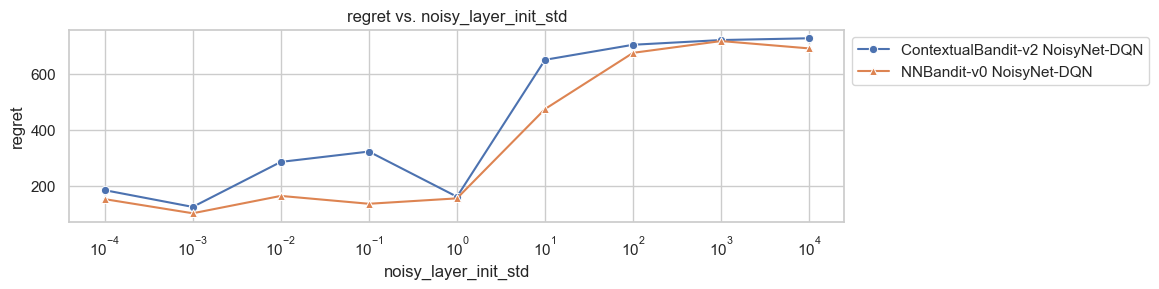

In [277]:
plot_noisynet_metric('noisy_layer_init_std','regret',True)

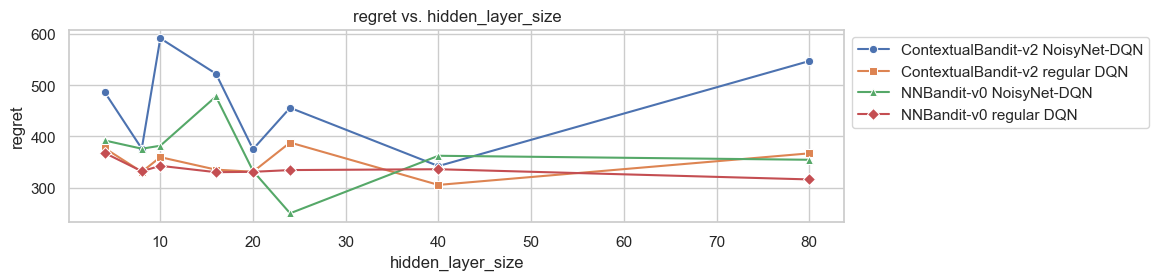

In [278]:
plot_metric('hidden_layer_size','regret',False)

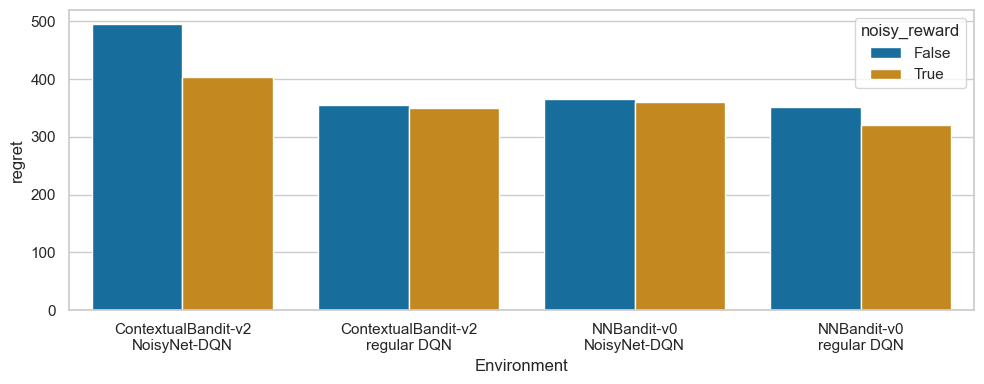

In [279]:
grouped_barplot_binary_metric('noisy_reward','regret', True, False)

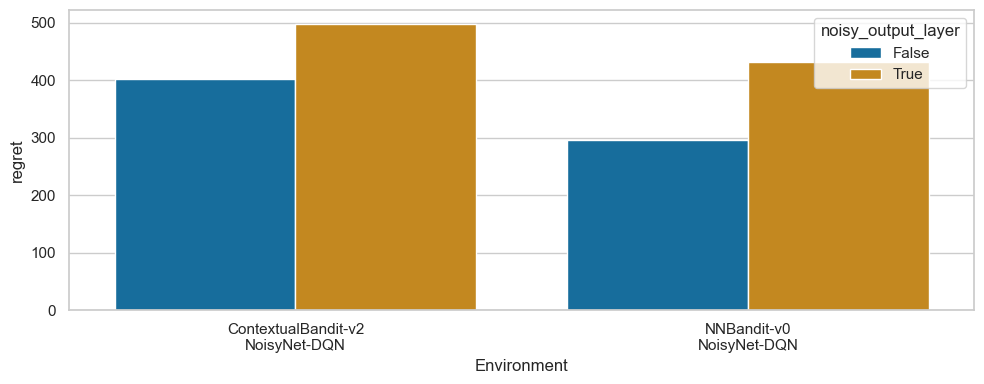

In [280]:
grouped_barplot_binary_noisynet_metric('noisy_output_layer','regret', True, False)

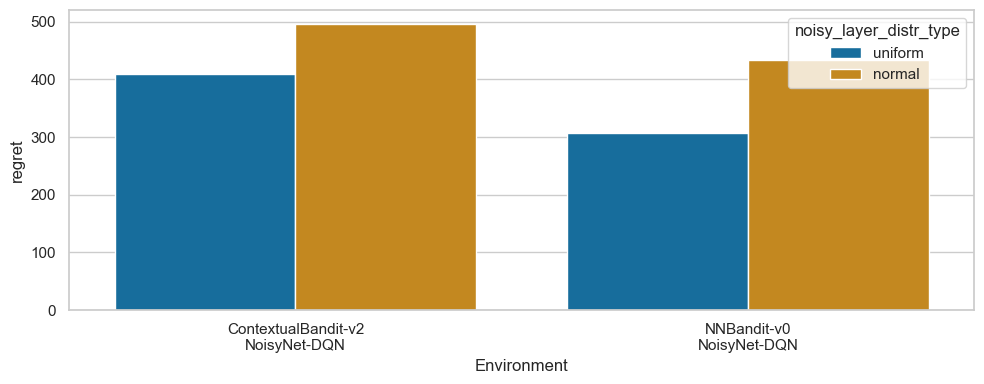

In [281]:
grouped_barplot_binary_noisynet_metric('noisy_layer_distr_type','regret','uniform','normal')